# MAGIC04 - MAGIC Gamma Telescope
## Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

### Dataset Information

### Additional Information

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in:

    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).

http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_validate

## Exploratory Data Analysis

In [4]:
data = pd.read_csv('magic04.data',header=None)
data.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
# Corroborando que no hayan datos faltantes
for col in data.columns:
    print(col,pd.unique(data[col]))

fLength [ 28.7967  31.6036 162.052  ...  75.4455 120.5135 187.1814]
fWidth [ 16.0021  11.7235 136.031  ...  47.5305  76.9018  53.0014]
fSize [2.6449 2.5185 4.0612 ... 3.6872 2.8307 3.2093]
fConc [0.3918 0.5303 0.0374 ... 0.7544 0.5857 0.0944]
fConc1 [0.1982 0.3773 0.0187 ... 0.3591 0.3791 0.3934]
fAsym [  27.7004   26.2722  116.741  ...   -9.3561    5.8043 -167.3125]
fM3Long [  22.011    23.8238  -64.858  ...   41.0562  -93.5224 -168.4558]
fM3Trans [ -8.2027  -9.9574 -45.216  ...  -9.4662 -63.8389  31.4755]
fAlpha [40.092   6.3609 76.96   ... 30.2987 84.6874 52.731 ]
fDist [ 81.8828 205.261  256.788  ... 256.5166 408.3166 272.3174]
class ['g' 'h']


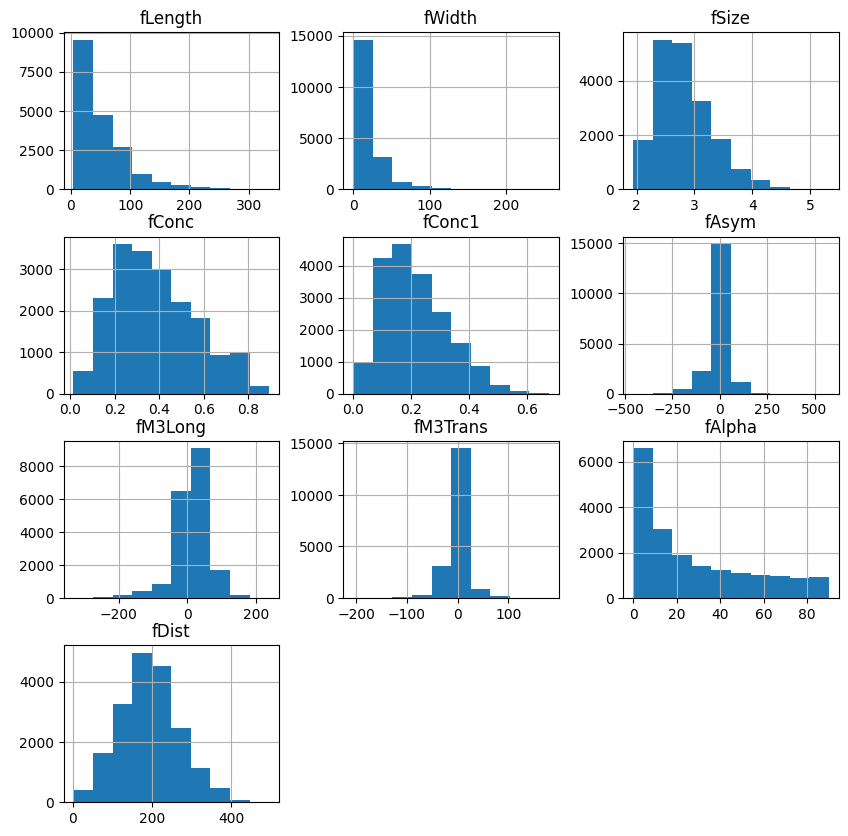

In [6]:
data.hist(figsize=(10,10));

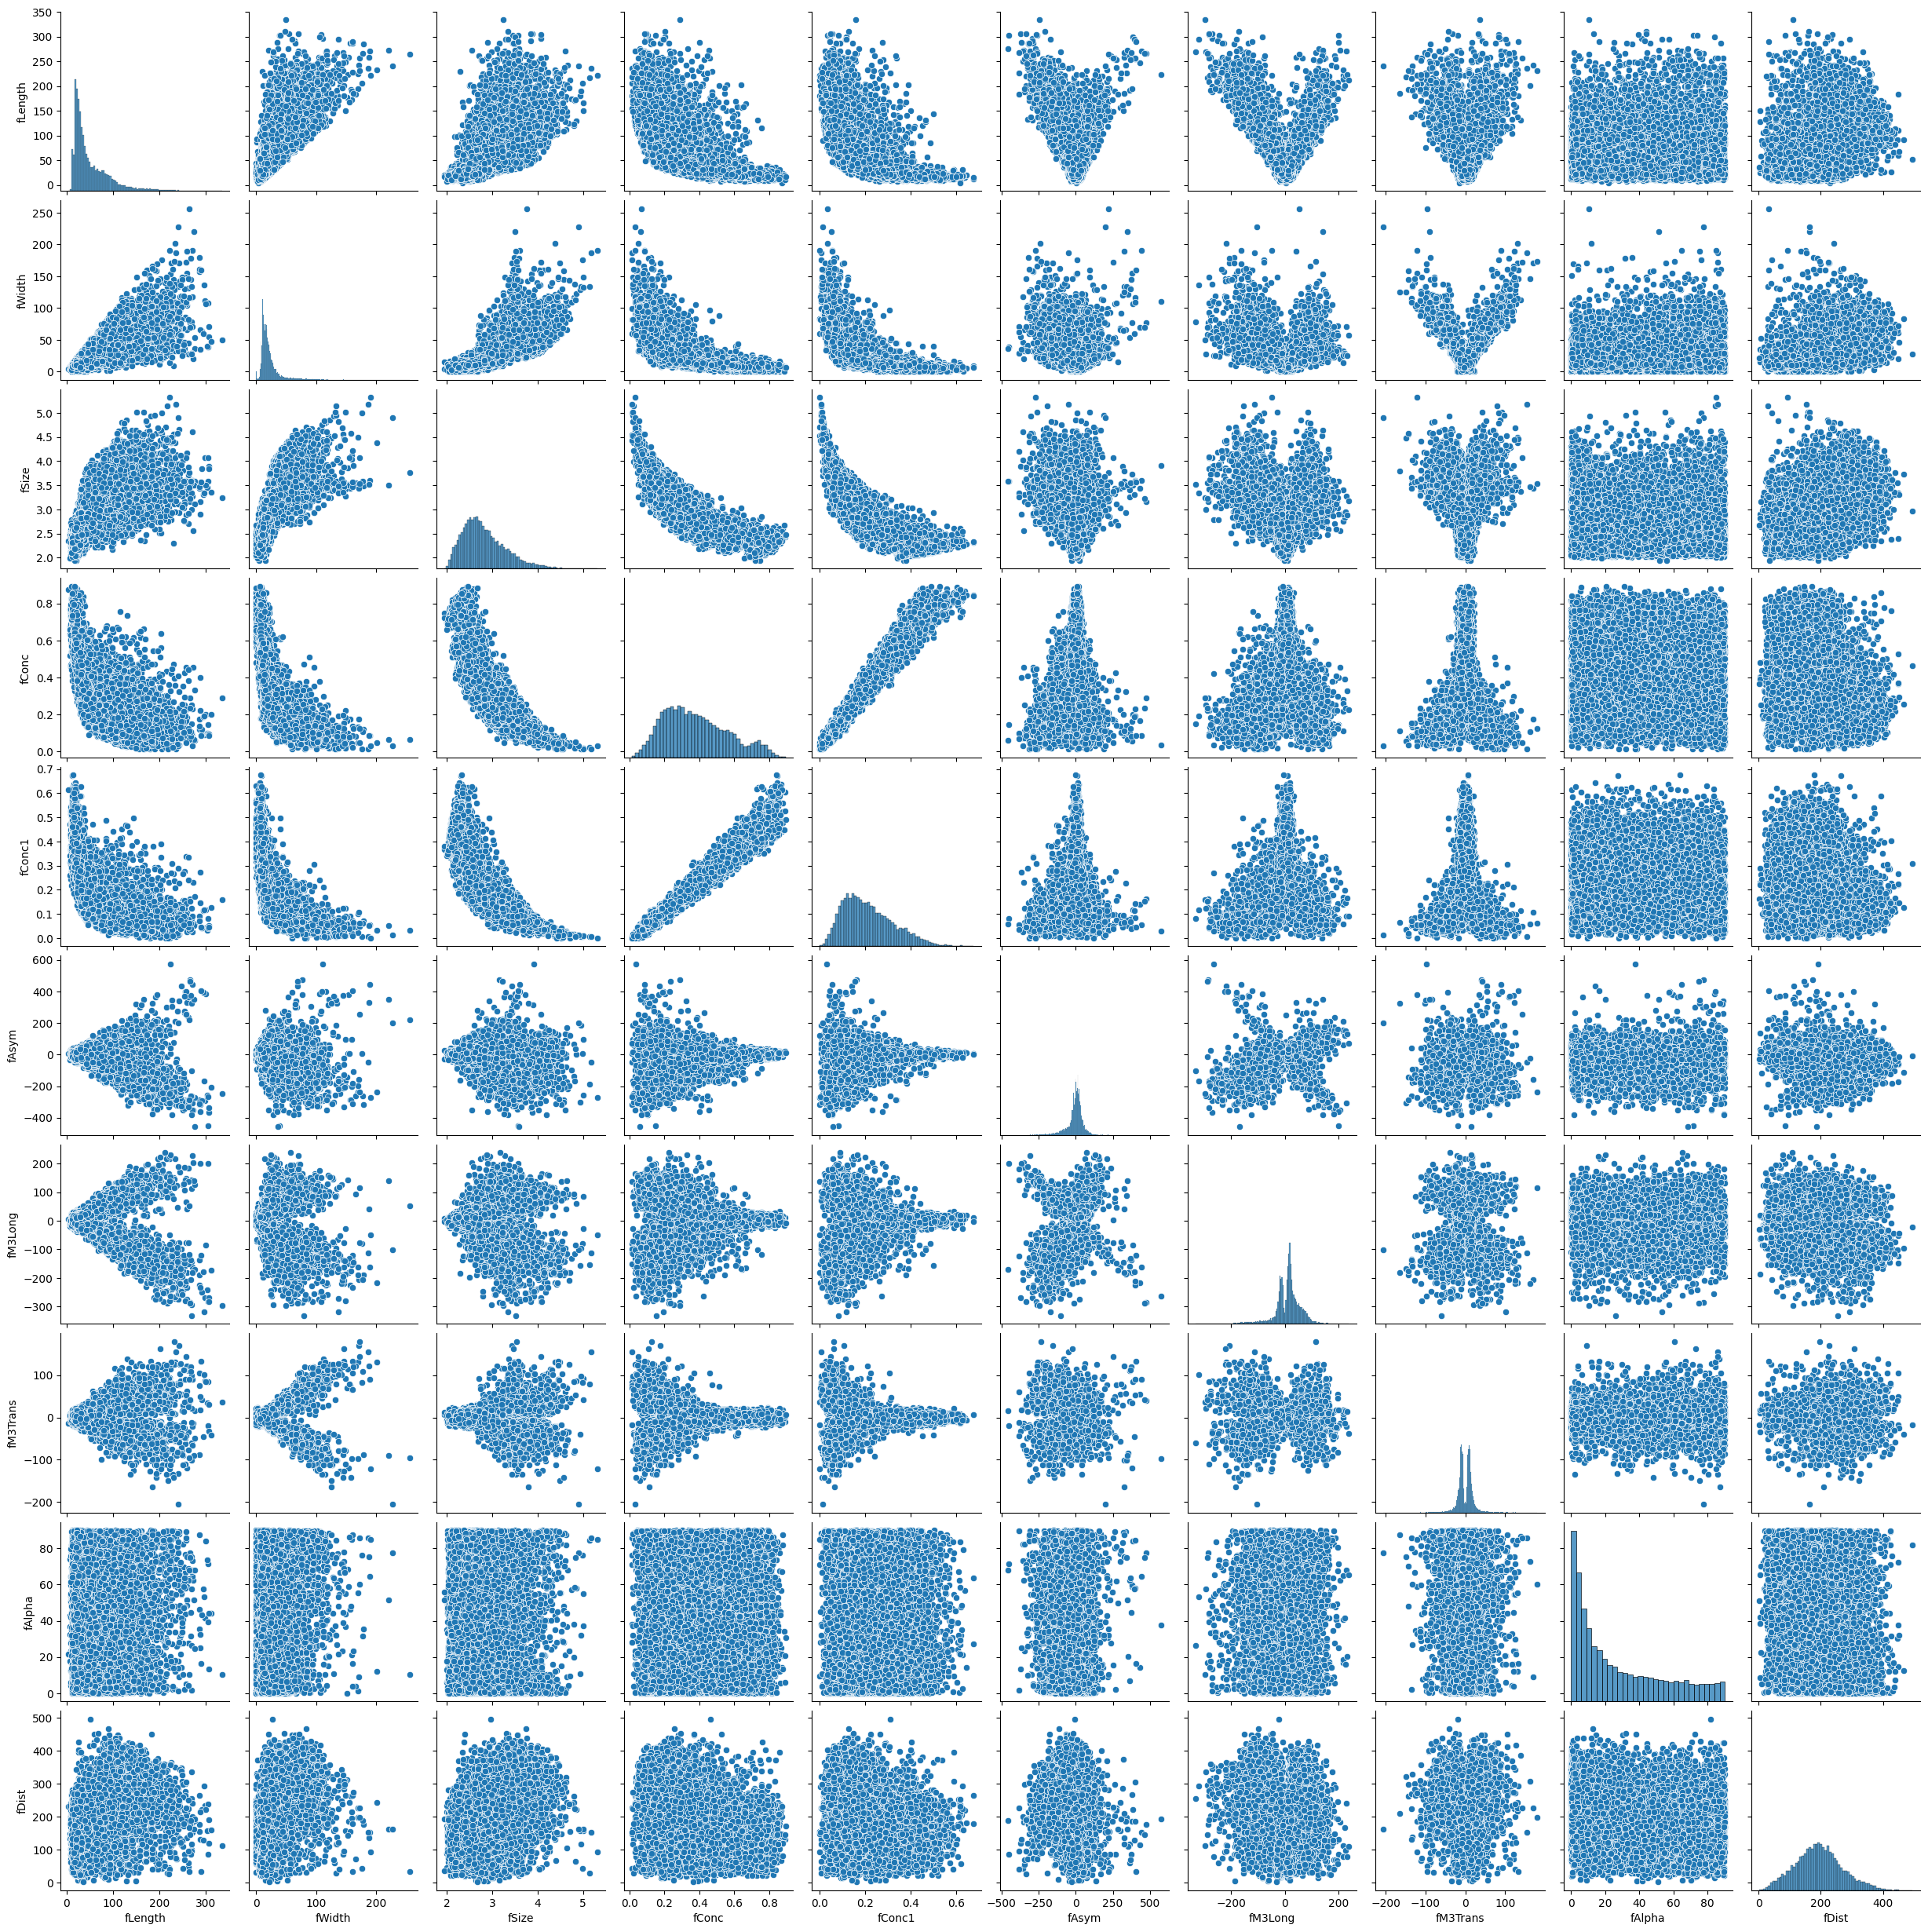

In [5]:
sns.pairplot(data)

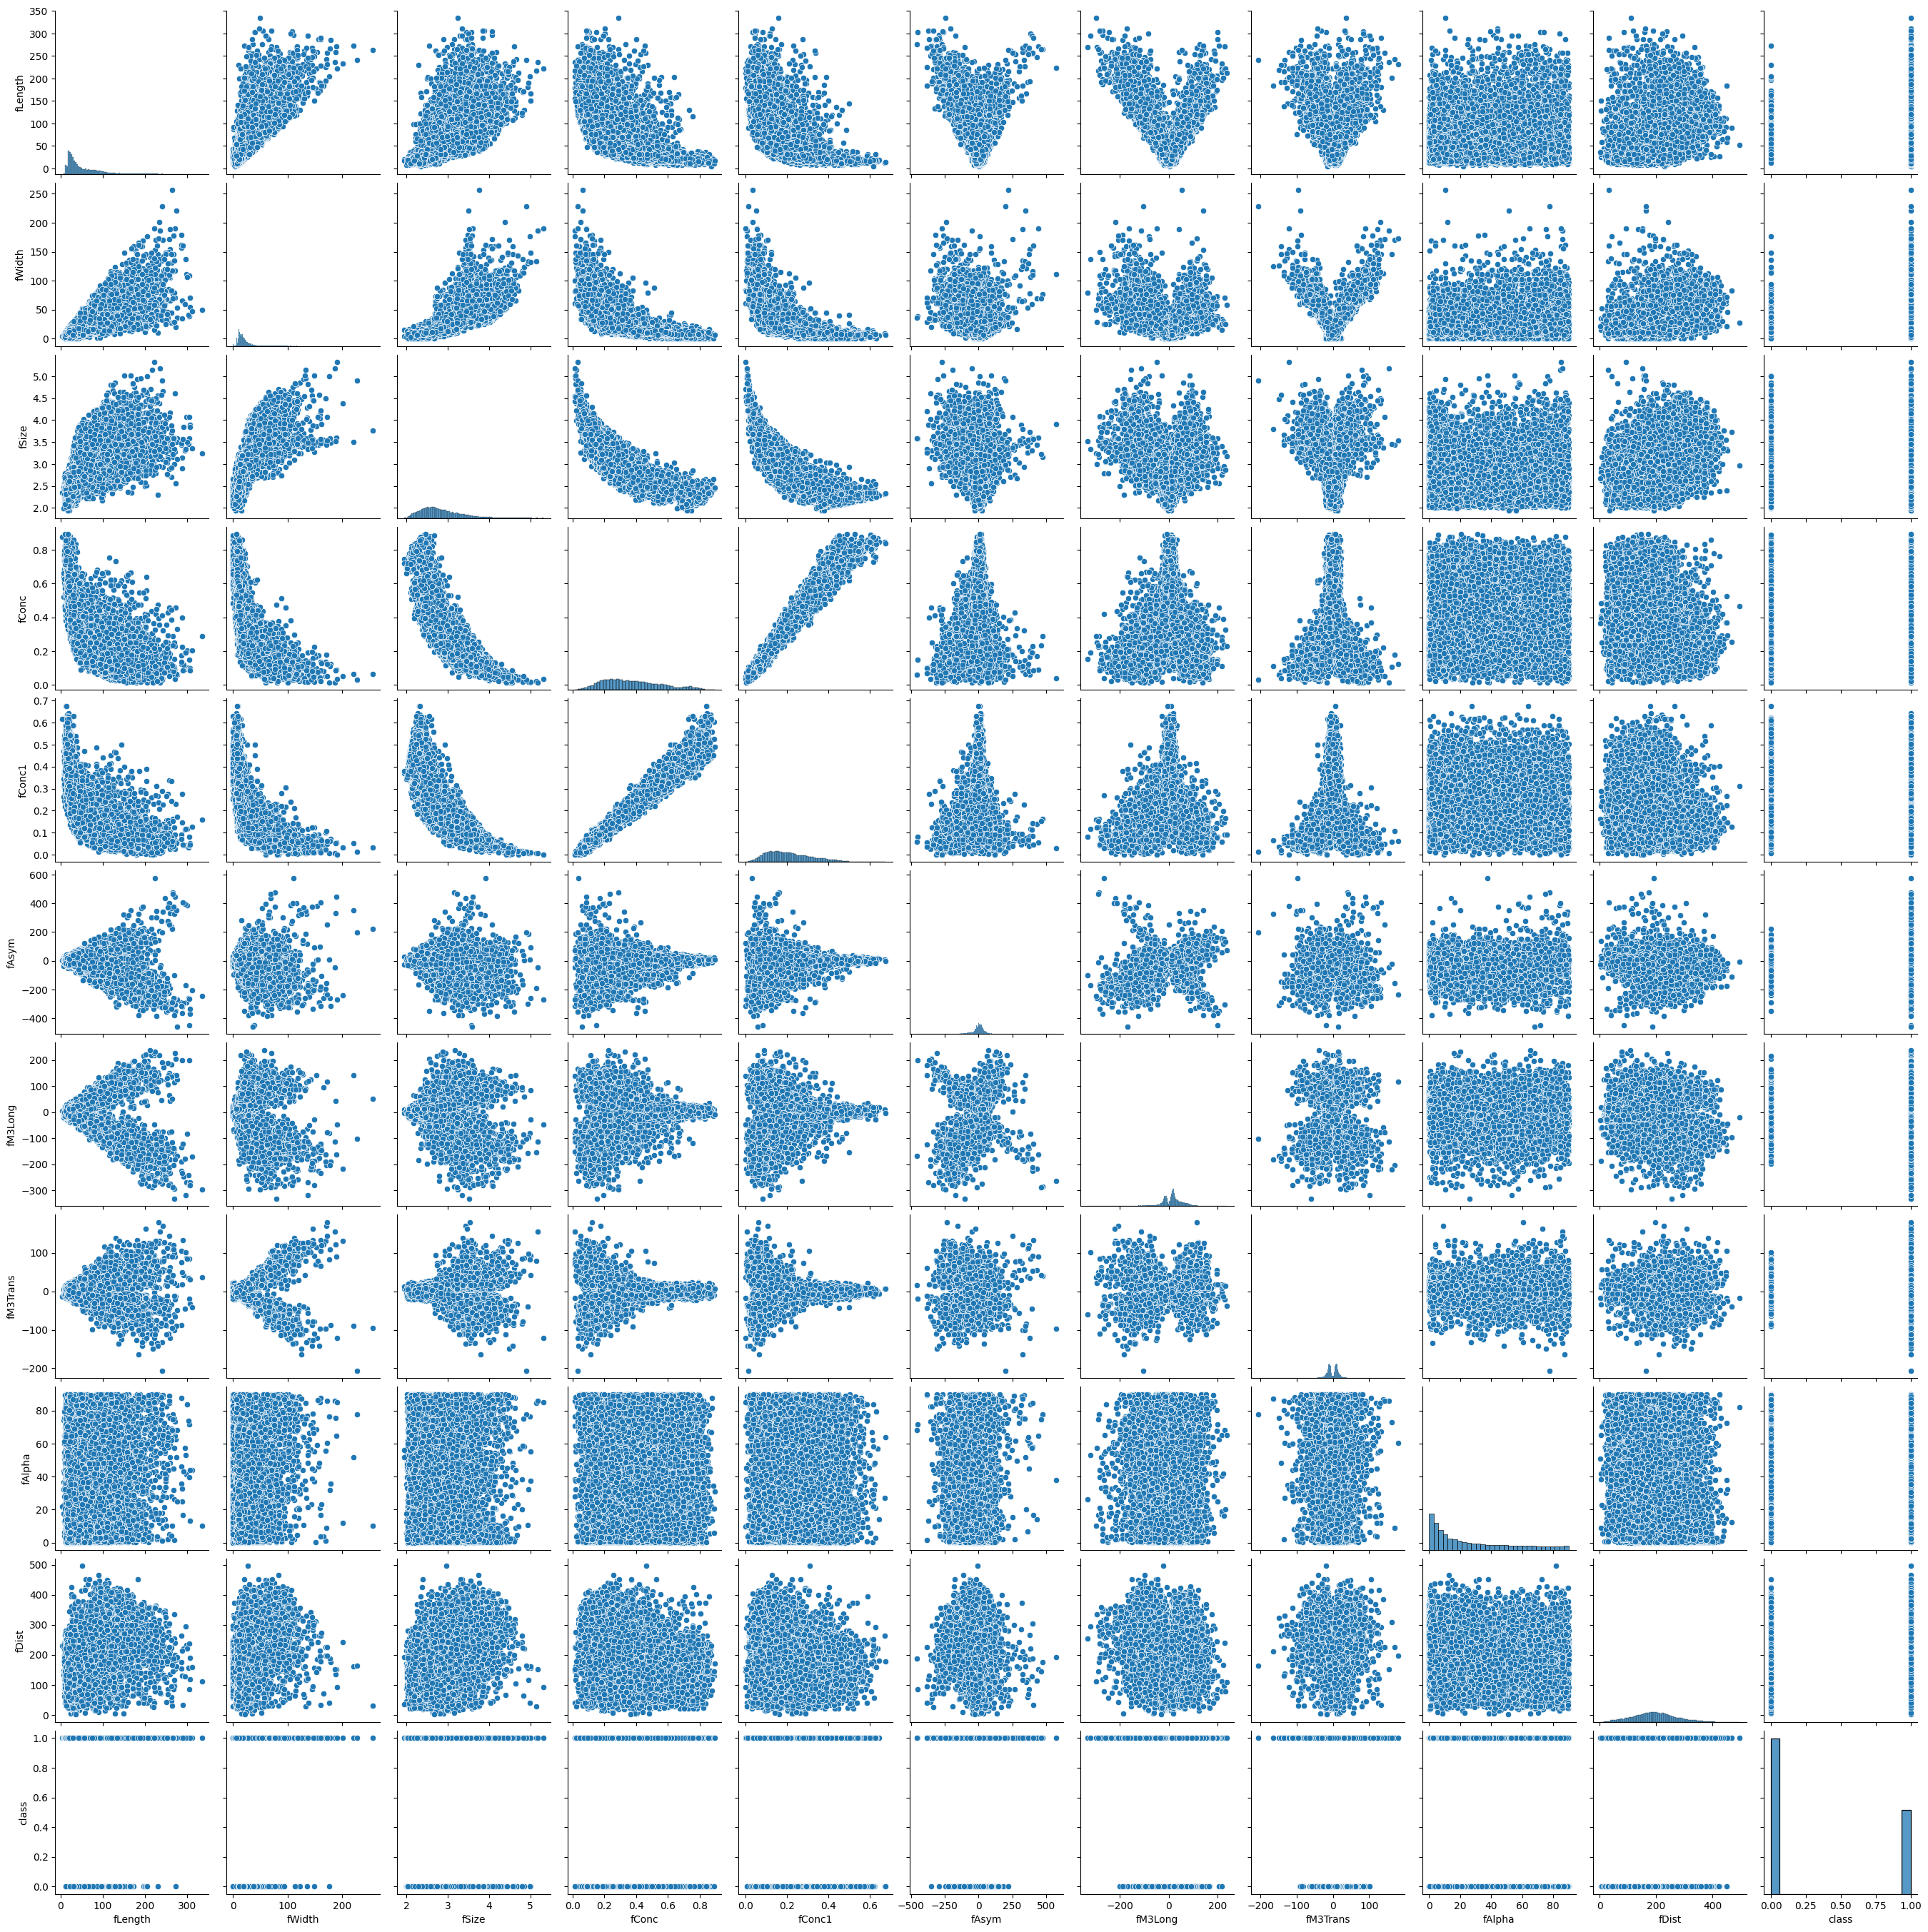

In [6]:
data2 = data
data2 = data2.replace('g',0).replace('h',1)
data2['class'] = data2['class'].astype('int8')
sns.pairplot(data2)

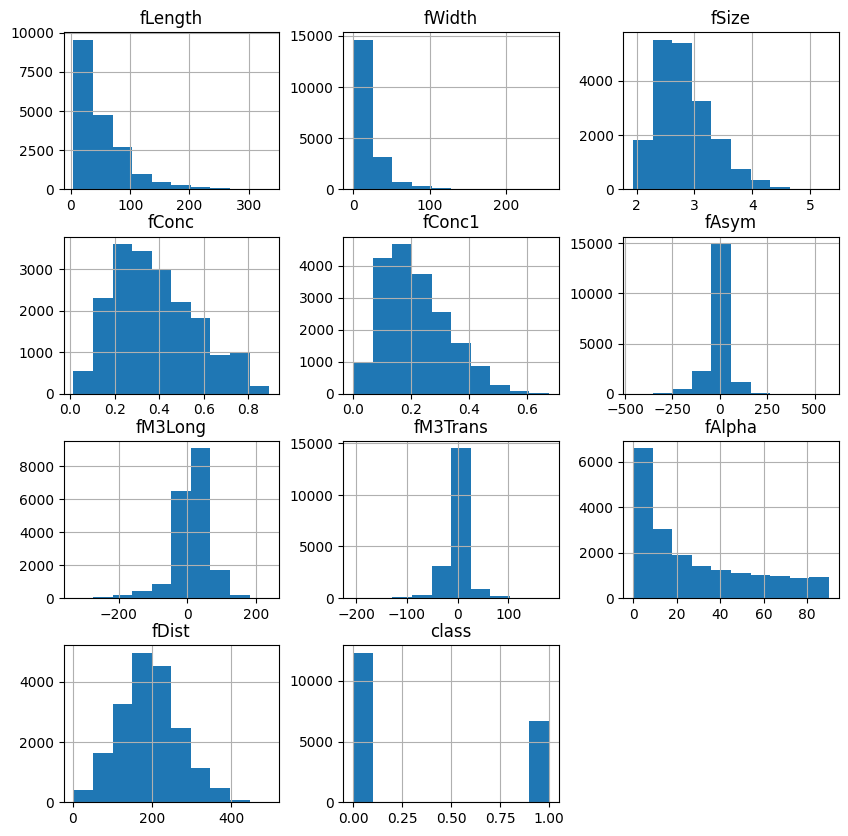

In [7]:
data2.hist(figsize=(10,10));

## Data splitting in train and test sets & scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(data2.drop(columns=['class']), data2[['class']],train_size=0.7, random_state=0)

scaler = StandardScaler()
scaler.set_output(transform="pandas")

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

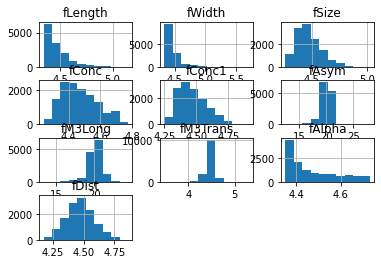

In [71]:
X_train.hist();

## Logística

In [9]:
LR1_model = LogisticRegression(random_state=0)
LR1_model.fit(X_train, Y_train)
LR1_Yhat_train = LR1_model.predict(X_train)
LR1_Yhat_test = LR1_model.predict(X_test)

LR1_accuracy_train = accuracy_score(Y_train, LR1_Yhat_train)
print('LR1_accuracy_train =', LR1_accuracy_train)
LR1_accuracy_test = accuracy_score(Y_test, LR1_Yhat_test)
print('LR1_accuracy_test =', LR1_accuracy_test)

LR1_precision_train = precision_score(Y_train, LR1_Yhat_train)
print('LR1_precision_train =', LR1_precision_train)
LR1_precision_test = precision_score(Y_test, LR1_Yhat_test)
print('LR1_precision_test =', LR1_precision_test)

LR1_recall_train = recall_score(Y_train, LR1_Yhat_train)
print('LR1_recall_train =', LR1_recall_train)
LR1_recall_test = recall_score(Y_test, LR1_Yhat_test)
print('LR1_recall_test =', LR1_recall_test)

C:\Users\aisidoro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR1_accuracy_train = 0.7887937509388614
LR1_accuracy_test = 0.7917981072555205
LR1_precision_train = 0.7579794615598112
LR1_precision_test = 0.7675919948353777
LR1_recall_train = 0.584671376578891
LR1_recall_test = 0.5894893406048587


C:\Users\aisidoro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## PCA

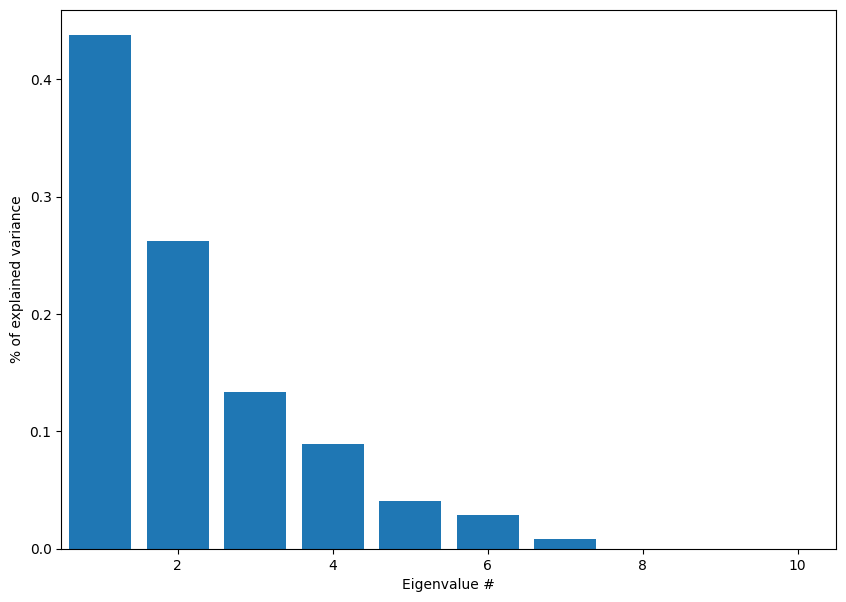

Cumulative sum of explained variance (%): [ 43.72856384  69.9554782   83.34362493  92.29161994  96.32070247
  99.2063338   99.99935259  99.99992594  99.99999742 100.        ]


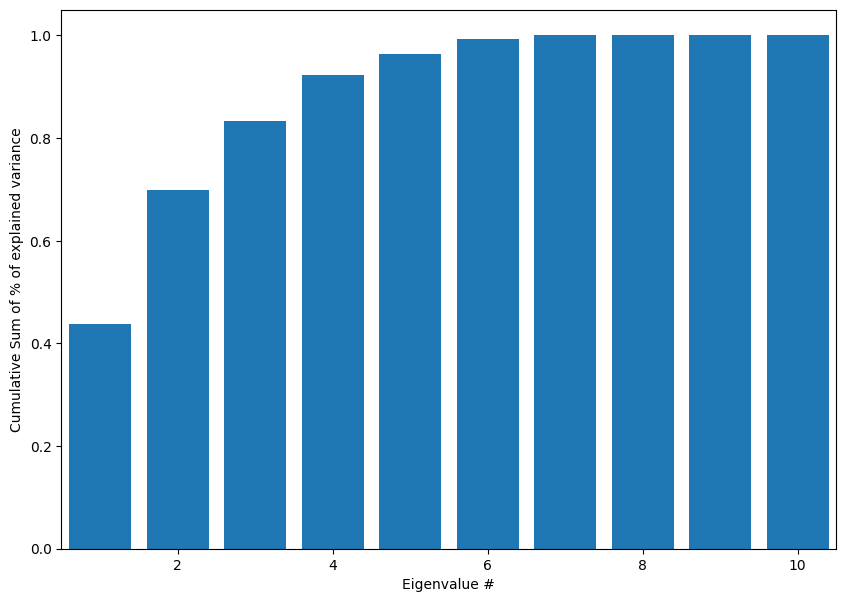

C:\Users\aisidoro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
PCA_model = PCA(random_state=0)
PCA_model.fit(X_train)
X_train_pca = PCA_model.transform(X_train)
X_test_pca = PCA_model.transform(X_test)
PCA_EV = PCA_model.explained_variance_ratio_
PCA_EV
PCA_Evectors = PCA_model.components_
# Plotting the covariance ratio
plt.figure(figsize=(10,7))
plt.bar(np.arange(1,len(PCA_EV)+1),PCA_EV)
plt.xlabel('Eigenvalue #')
plt.ylabel('% of explained variance')
plt.xlim(0.5,len(PCA_EV)+0.5)
plt.show()
# Plotting the cumulative sum of covariance ratio
cumsumvar_PCA = np.cumsum(PCA_EV)
print('Cumulative sum of explained variance (%):', 100*cumsumvar_PCA)
plt.figure(figsize=(10,7))
plt.bar(np.arange(1,len(PCA_EV)+1),np.cumsum(PCA_EV))
plt.xlabel('Eigenvalue #')
plt.ylabel('Cumulative Sum of % of explained variance')
plt.xlim(0.5,len(PCA_EV)+0.5)
plt.show()

# Dos eigenvectores pueden explicar ~89% de varianza, mientras que 3 alrededor de ~98%
# Elegiremos los 2 primeros acorde con la regla de dedo de elegir llegando a ~80% de varianza acumulada
X_train_pca_r = X_train_pca[:,0:2]
X_test_pca_r = X_test_pca[:,0:2]

LR2_model = LogisticRegression(random_state=0)
LR2_model.fit(X_train_pca_r, Y_train)
LR2_Yhat_train = LR2_model.predict(X_train_pca_r)
LR2_Yhat_test = LR2_model.predict(X_test_pca_r)


In [11]:
# Elegimos 5 primeras columnas
NcolsPCA=5
print(np.shape(X_train_pca_r)[1],'columnas seleccionadas con', 100*cumsumvar_PCA[NcolsPCA-1],'% de porcentaje acumulado de variación explicada')

X_train_pca_r = X_train_pca[:,0:NcolsPCA]
X_test_pca_r = X_test_pca[:,0:NcolsPCA]

LR2_model = LogisticRegression(random_state=0)
LR2_model.fit(X_train_pca_r, Y_train)
LR2_Yhat_train = LR2_model.predict(X_train_pca_r)
LR2_Yhat_test = LR2_model.predict(X_test_pca_r)

LR2_accuracy_train = accuracy_score(Y_train, LR2_Yhat_train)
print('LR2_accuracy_train =', LR2_accuracy_train)
LR2_accuracy_test = accuracy_score(Y_test, LR2_Yhat_test)
print('LR2_accuracy_test =', LR2_accuracy_test)

LR2_precision_train = precision_score(Y_train, LR2_Yhat_train)
print('LR2_precision_train =', LR2_precision_train)
LR2_precision_test = precision_score(Y_test, LR2_Yhat_test)
print('LR2_precision_test =', LR2_precision_test)

LR2_recall_train = recall_score(Y_train, LR2_Yhat_train)
print('LR2_recall_train =', LR2_recall_train)
LR2_recall_test = recall_score(Y_test, LR2_Yhat_test)
print('LR2_recall_test =', LR2_recall_test)


C:\Users\aisidoro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2 columnas seleccionadas con 96.32070247418876 % de porcentaje acumulado de variación explicada
LR2_accuracy_train = 0.7910470181763557
LR2_accuracy_test = 0.7912723449001051
LR2_precision_train = 0.7679432624113475
LR2_precision_test = 0.7724274406332454
LR2_recall_train = 0.5795332905159495
LR2_recall_test = 0.5805651958353991


## LDA - Classification

In [12]:
LDA_model = LDA(store_covariance=True)
LDA_model = LDA_model.fit(X_train,Y_train)
print('LDA explained_variance_ratio_ =',LDA_model.explained_variance_ratio_)
print('LDA coef_ =',LDA_model.coef_)

LR4_Yhat_train = LDA_model.predict(X_train)
LR4_Yhat_test = LDA_model.predict(X_test)


LR4_accuracy_train = accuracy_score(Y_train, LR4_Yhat_train)
print('LR4_accuracy_train =', LR4_accuracy_train)
LR4_accuracy_test = accuracy_score(Y_test, LR4_Yhat_test)
print('LR4_accuracy_test =', LR4_accuracy_test)

LR4_precision_train = precision_score(Y_train, LR4_Yhat_train)
print('LR4_precision_train =', LR4_precision_train)
LR4_precision_test = precision_score(Y_test, LR4_Yhat_test)
print('LR4_precision_test =', LR4_precision_test)

LR4_recall_train = recall_score(Y_train, LR4_Yhat_train)
print('LR4_recall_train =', LR4_recall_train)
LR4_recall_test = recall_score(Y_test, LR4_Yhat_test)
print('LR4_recall_test =', LR4_recall_test)


LDA explained_variance_ratio_ = [1.]
LDA coef_ = [[ 2.29588934e-02 -3.52570612e-03  7.91091460e-01 -3.53896509e-01
   5.52086053e+00 -7.30905171e-04 -3.55788131e-03 -8.71879543e-04
   5.21986666e-02  1.57527649e-03]]
LR4_accuracy_train = 0.782935256121376
LR4_accuracy_test = 0.7835611636873466
LR4_precision_train = 0.7626069006192864
LR4_precision_test = 0.7678082191780822
LR4_recall_train = 0.5536287732819525
LR4_recall_test = 0.5557759048091224


C:\Users\aisidoro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistica Cross Validation

In [125]:
LR1_model = LogisticRegression(random_state=0)

# generador de indices para cross validation
cv = (
    train_test_split(np.arange(Y_train.shape[0]) , test_size=0.3, random_state=i, stratify=Y_train)
    for i in [0, 50503, 8254, 12345, 316, 8902, 7822, 8228, 9574, 336]
)

cv_results = cross_validate(
    LR1_model,
    X_train,
    Y_train.values.ravel(),
    cv=cv,
    scoring=['accuracy', 'precision', 'recall'],
    return_train_score=True,
    # return_estimator=True,
)

In [126]:
print(f"Test accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Test precision: {cv_results['test_precision'].mean():.3f}")
print(f"Test recall: {cv_results['test_recall'].mean():.3f}")

Test accuracy: 0.791
Test precision: 0.762
Test recall: 0.589


## Results

In [13]:
Res_cols = ['1_LogisticRegression','2_LogisticRegression_PCA','4_LDA_prediction']
Res_metrics_train = {
    'Accuracy': [LR1_accuracy_train,LR2_accuracy_train,LR4_accuracy_train],
    'Recall': [LR1_recall_train,LR2_recall_train,LR4_recall_train],
    'Precision': [LR1_precision_train,LR2_precision_train,LR4_precision_train],
}
metrics_train = pd.DataFrame(Res_metrics_train, index=Res_cols)

Res_cols = ['1_LogisticRegression','2_LogisticRegression_PCA','4_LDA_prediction']
Res_metrics_test = {
    'Accuracy': [LR1_accuracy_test,LR2_accuracy_test,LR4_accuracy_test],
    'Recall': [LR1_recall_test,LR2_recall_test,LR4_recall_test],
    'Precision': [LR1_precision_test,LR2_precision_test,LR4_precision_test],
}
metrics_test = pd.DataFrame(Res_metrics_test, index=Res_cols)

print('Train\n',metrics_train,'\n\nTest\n',metrics_test)


Train
                           Accuracy    Recall  Precision
1_LogisticRegression      0.788794  0.584671   0.757979
2_LogisticRegression_PCA  0.791047  0.579533   0.767943
4_LDA_prediction          0.782935  0.553629   0.762607 

Test
                           Accuracy    Recall  Precision
1_LogisticRegression      0.791798  0.589489   0.767592
2_LogisticRegression_PCA  0.791272  0.580565   0.772427
4_LDA_prediction          0.783561  0.555776   0.767808


# END